<a href="https://colab.research.google.com/github/GawainGan/Causal-Inference/blob/main/Causal%20Inference%20and%20Discovery%20in%20Python/Chap_5_Forks%2C_CHinas%2C_and_Immoralities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building three graphs: chain, fork and collider

### Pakcage & Setting

In [13]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [14]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [1]:
NOISE_LEVEL = .2 # standard deviation of noise variables in our datasets
N_SAMPLES = 1000

### Chain Structure

A -> B -> C

In [4]:
a = np.random.randn(N_SAMPLES)
b = a + NOISE_LEVEL*np.random.randn(N_SAMPLES)
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES)

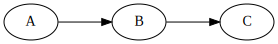

In [16]:
# chain graph visualization
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/chain_graph_abc')

graph

Here the chain structured graph means: that A directly influences B (but not C ) and B
influences C (but not A ). C does not have any further influence

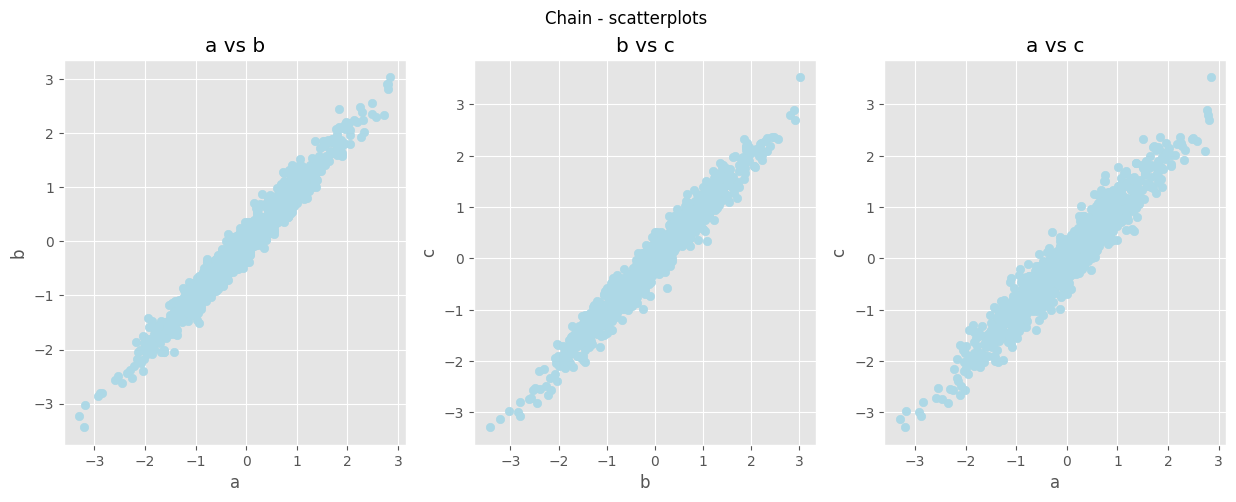

In [12]:
# scatter plot for all combination of abc
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(a,b, c='lightblue')
plt.xlabel("a")
plt.ylabel("b")
plt.title("a vs b")

plt.subplot(1,3,2)
plt.scatter(b,c, c='lightblue')
plt.xlabel("b")
plt.ylabel("c")
plt.title("b vs c")

plt.subplot(1,3,3)
plt.scatter(a,c, c='lightblue')
plt.xlabel("a")
plt.ylabel("c")
plt.title("a vs c")

plt.suptitle('Chain - scatterplots')
plt.show()

In [17]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.205e+04
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        02:43:58   Log-Likelihood:                 147.39
No. Observations:                1000   AIC:                            -288.8
Df Residuals:                     997   BIC:                            -274.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.007     -1.162      0.2

In [23]:
print(f"A & B \nPearson: {stats.pearsonr(a, b)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,b)[1]<=0.05 else '>0.05'}\n")
print(f"B & C \nPearson: {stats.pearsonr(b, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(b,c)[1]<=0.05 else '>0.05'}\n")
print(f"A & C \nPearson: {stats.pearsonr(a, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,c)[1]<=0.05 else '>0.05'}")

A & B 
Pearson: 0.9822896925246022
P-value: <0.05

B & C 
Pearson: 0.9799102890684306
P-value: <0.05

A & C 
Pearson: 0.9640541210055865
P-value: <0.05


三者间，Pearson Value显示了很强的正相关性(>0.98)

并且P-value都显著，即三者间都存现显著的相关性

### Fork Structure

A <- B -> C

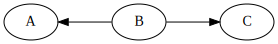

In [46]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['BA', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_fork_00')

graph

In [47]:
b = np.random.randn(N_SAMPLES)
a = b + NOISE_LEVEL*np.random.randn(N_SAMPLES)
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES)

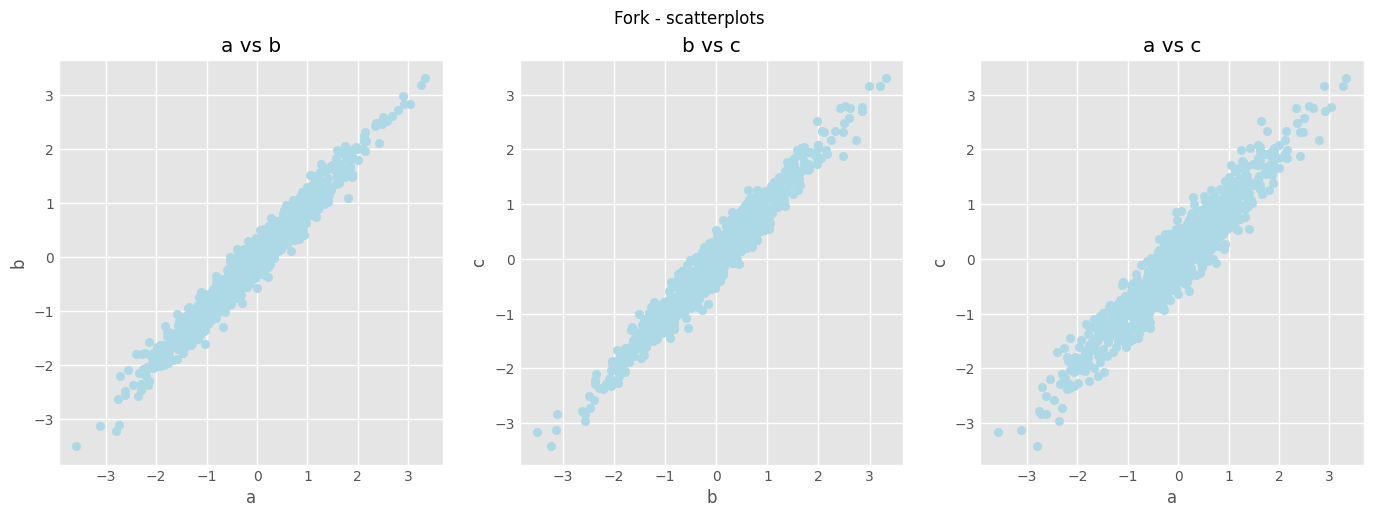

In [48]:
# scatter plot for all combination of abc
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(a,b, c='lightblue')
plt.xlabel("a")
plt.ylabel("b")
plt.title("a vs b")

plt.subplot(1,3,2)
plt.scatter(b,c, c='lightblue')
plt.xlabel("b")
plt.ylabel("c")
plt.title("b vs c")

plt.subplot(1,3,3)
plt.scatter(a,c, c='lightblue')
plt.xlabel("a")
plt.ylabel("c")
plt.title("a vs c")

plt.suptitle('Fork - scatterplots')
plt.show()

In [49]:
print(f"A & B \nPearson: {stats.pearsonr(a, b)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,b)[1]<=0.05 else '>0.05'}\n")
print(f"B & C \nPearson: {stats.pearsonr(b, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(b,c)[1]<=0.05 else '>0.05'}\n")
print(f"A & C \nPearson: {stats.pearsonr(a, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,c)[1]<=0.05 else '>0.05'}")

A & B 
Pearson: 0.9795749374222626
P-value: <0.05

B & C 
Pearson: 0.9793496725286049
P-value: <0.05

A & C 
Pearson: 0.9575070572352123
P-value: <0.05


In [50]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:22:05   Log-Likelihood:                 168.61
No. Observations:                1000   AIC:                            -331.2
Df Residuals:                     997   BIC:                            -316.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.006     -0.052      0.9

### Collider Structured Graph
 A -> B <- C

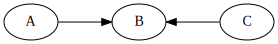

In [37]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'CB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_collider_00')

graph

In [42]:
a = np.random.randn(N_SAMPLES)
c = np.random.randn(N_SAMPLES)
b = a + c + NOISE_LEVEL*np.random.randn(N_SAMPLES)

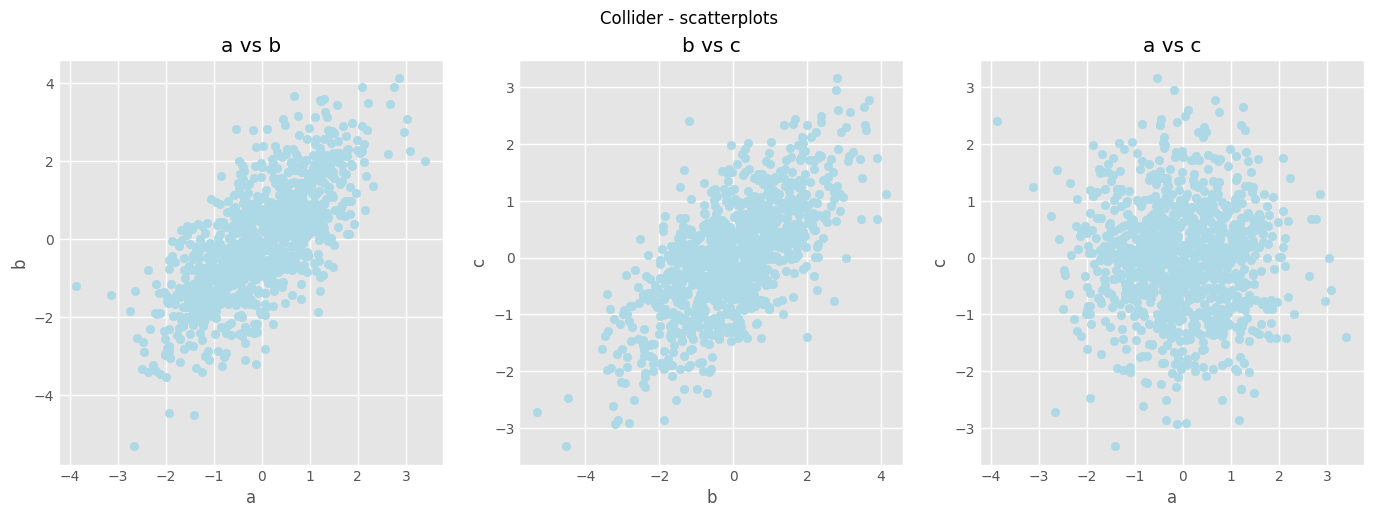

In [43]:
# scatter plot for all combination of abc
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(a,b, c='lightblue')
plt.xlabel("a")
plt.ylabel("b")
plt.title("a vs b")

plt.subplot(1,3,2)
plt.scatter(b,c, c='lightblue')
plt.xlabel("b")
plt.ylabel("c")
plt.title("b vs c")

plt.subplot(1,3,3)
plt.scatter(a,c, c='lightblue')
plt.xlabel("a")
plt.ylabel("c")
plt.title("a vs c")

plt.suptitle('Collider - scatterplots')
plt.show()

In [44]:
print(f"A & B \nPearson: {stats.pearsonr(a, b)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,b)[1]<=0.05 else '>0.05'}\n")
print(f"B & C \nPearson: {stats.pearsonr(b, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(b,c)[1]<=0.05 else '>0.05'}\n")
print(f"A & C \nPearson: {stats.pearsonr(a, c)[0]}\nP-value: {'<0.05' if stats.pearsonr(a,c)[1]<=0.05 else '>0.05'}")

A & B 
Pearson: 0.7019760795731586
P-value: <0.05

B & C 
Pearson: 0.6727581355006004
P-value: <0.05

A & C 
Pearson: -0.03531124126318264
P-value: >0.05


A 和 C 的相关系数是 -0.0x，表示它们之间有非常弱的负相关，且P-value也表示其相关性的不显著。

注意：尽管相关系数很小（接近 0），但由于样本数量达到一定数量的情况下，即使是微弱的相关性也可能在统计上显著。实际意义上，这种关系可能并不重要，但统计上我们可以说它不是完全独立的。

In [45]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:21:36   Log-Likelihood:                 215.37
No. Observations:                1000   AIC:                            -424.7
Df Residuals:                     997   BIC:                            -410.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.006     -0.885      0.3

### Comparision of three Structured Graph (Regress C on A and B)

在因果图结构中，链、叉和碰撞三种结构对变量之间的依赖性有不同的影响。在这三种结构中：

1.	链结构（Chain）：
	- A → B → C
	- 在这种结构中，A 和 C 之间是条件依赖的。
2.	叉结构（Fork）：
	- A ← B → C
	- 在这种结构中，A 和 C 之间是条件独立的，但在不控制 B 的情况下，A 和 C 显示出依赖性。
3.	碰撞结构（Collider）：
	- A → B ← C
	- 在这种结构中，A 和 C 是无条件独立的，但在控制 B 的情况下，它们变得条件依赖。

因此：我们使用线性回归模型来分析变量 C （因变量）与变量 A 和 B（自变量）的关系

请注意：如果我们用 A 作为因变量来拟合模型，我们仍然能够看到在不同结构下 A 和 C 的 p 值（代表显著性）是不显著的，特别是在叉结构和碰撞结构中

### 回归分析结果

#### Chain 结构

|          a    | Coef  | Std Err | t      | P>t | [0.025 | 0.975] |
|---------------|-------|---------|--------|------|--------|--------|
| A             | 0.0444  | 0.035   | 1.267   | 0.205 | -0.024 | 0.113  |
| B             | 0.9584  | 0.034   | 27.847  | 0.000 | 0.891  | 1.026  |

#### Fork 结构

|        a       | Coef  | Std Err | t      | P>t | [0.025 | 0.975] |
|---------------|-------|---------|--------|------|--------|--------|
| A             | -0.0460 | 0.032   | -1.430  | 0.153 | -0.109 | 0.017  |
| B             | 1.0445  | 0.032   | 32.188  | 0.000 | 0.981  | 1.108  |

#### Collider 结构

|      a         | Coef  | Std Err | t      | P>t | [0.025 | 0.975] |
|---------------|-------|---------|--------|------|--------|--------|
| A             | -0.9494 | 0.008   | -113.250| 0.000 | -0.966 | -0.933 |
| B             | 0.9564  | 0.006   | 155.637 | 0.000 | 0.944  | 0.968  |



从三个线性模型拟合的结果来看，在Chain和Fork的结构中，A&C之间没有显著的相关性

二在Collider结构中，A&C之间是存在显著相关性的。这宗情况便是所谓的:**Suprious Relationships**

遇到这种伪相关性时，我们便可以理解到在现实生活中的某些情况下，控制特定条件可能会导致原本独立的变量表现出负相关的伪相关关系。这提醒我们在进行因果推理时要谨慎，避免因控制条件而得出错误的结论。

Question from the book: ** should we always
control for all the available variables?**

Answer:**It really depends on the circumstance, and it should never be “always” since controlling for all variables can lead to spurious relationships. For instance, in a collider structure, controlling for certain variables can introduce false correlations between otherwise independent variables. Therefore, the decision to control or not should be based on the specific causal structure and context to avoid misleading conclusions.**